In [3]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

In [9]:
data_path = '/kaggle/input/cs114-car-dataset'
data_all = []

# Duyệt qua từng thư mục con (hiệu xe)
for brand in os.listdir(data_path):
    brand_path = os.path.join(data_path, brand)
    if os.path.isdir(brand_path):
        # Lấy CategoryID tương ứng
        category_id = {
            'Others': 0,
            'Honda': 1,
            'Hyundai': 2,
            'KIA': 3,
            'Mazda': 4,
            'Mitsubishi': 5,
            'Suzuki': 6,
            'Toyota': 7,
            'VinFast': 8
        }.get(brand, -1)

        # Duyệt qua từng thư mục con (mẫu xe) trong thư mục hiệu xe
        for model in os.listdir(brand_path):
            model_path = os.path.join(brand_path, model)
            if os.path.isdir(model_path):
                # Duyệt qua từng file trong thư mục mẫu xe
                for img_file in os.listdir(model_path):
                    if img_file.lower().endswith('.jpg'):
                        # Giả sử tên file theo quy ước là MSSV.Hiệu xe.<số>.jpg
                        img_full_path = os.path.join(model_path, img_file)
                        data_all.append([img_full_path, category_id])

# Chuyển đổi dữ liệu thành DataFrame
df = pd.DataFrame(data_all, columns=['ImageFullPath', 'CategoryID'])

# Lưu vào file CSV
df.to_csv('CarDataset.csv', index=False)

print("Đã tạo thành công file CarDataset.csv")

Đã tạo thành công file CarDataset.csv


In [11]:
# Đọc dữ liệu từ CarDataset.csv
df = pd.read_csv('/kaggle/working/CarDataset.csv')

# Khởi tạo StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X = df['ImageFullPath'].values
y = df['CategoryID'].values

# Chia dữ liệu thành 5 splits
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    train_df = df.iloc[train_index]
    test_df = df.iloc[test_index]

    # Lưu vào các tệp CSV
    train_filename = f'CarDataset-Splits-{fold + 1}-Train.csv'
    test_filename = f'CarDataset-Splits-{fold + 1}-Test.csv'

    train_df.to_csv(train_filename, index=False)
    test_df.to_csv(test_filename, index=False)

    print(f'Split {fold + 1}:')
    print(f'Saved {train_filename} and {test_filename}')

Split 1:
Saved CarDataset-Splits-1-Train.csv and CarDataset-Splits-1-Test.csv
Split 2:
Saved CarDataset-Splits-2-Train.csv and CarDataset-Splits-2-Test.csv
Split 3:
Saved CarDataset-Splits-3-Train.csv and CarDataset-Splits-3-Test.csv
Split 4:
Saved CarDataset-Splits-4-Train.csv and CarDataset-Splits-4-Test.csv
Split 5:
Saved CarDataset-Splits-5-Train.csv and CarDataset-Splits-5-Test.csv


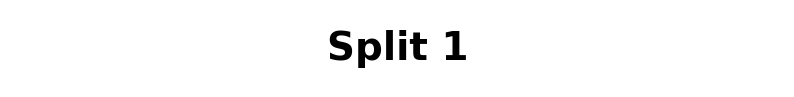

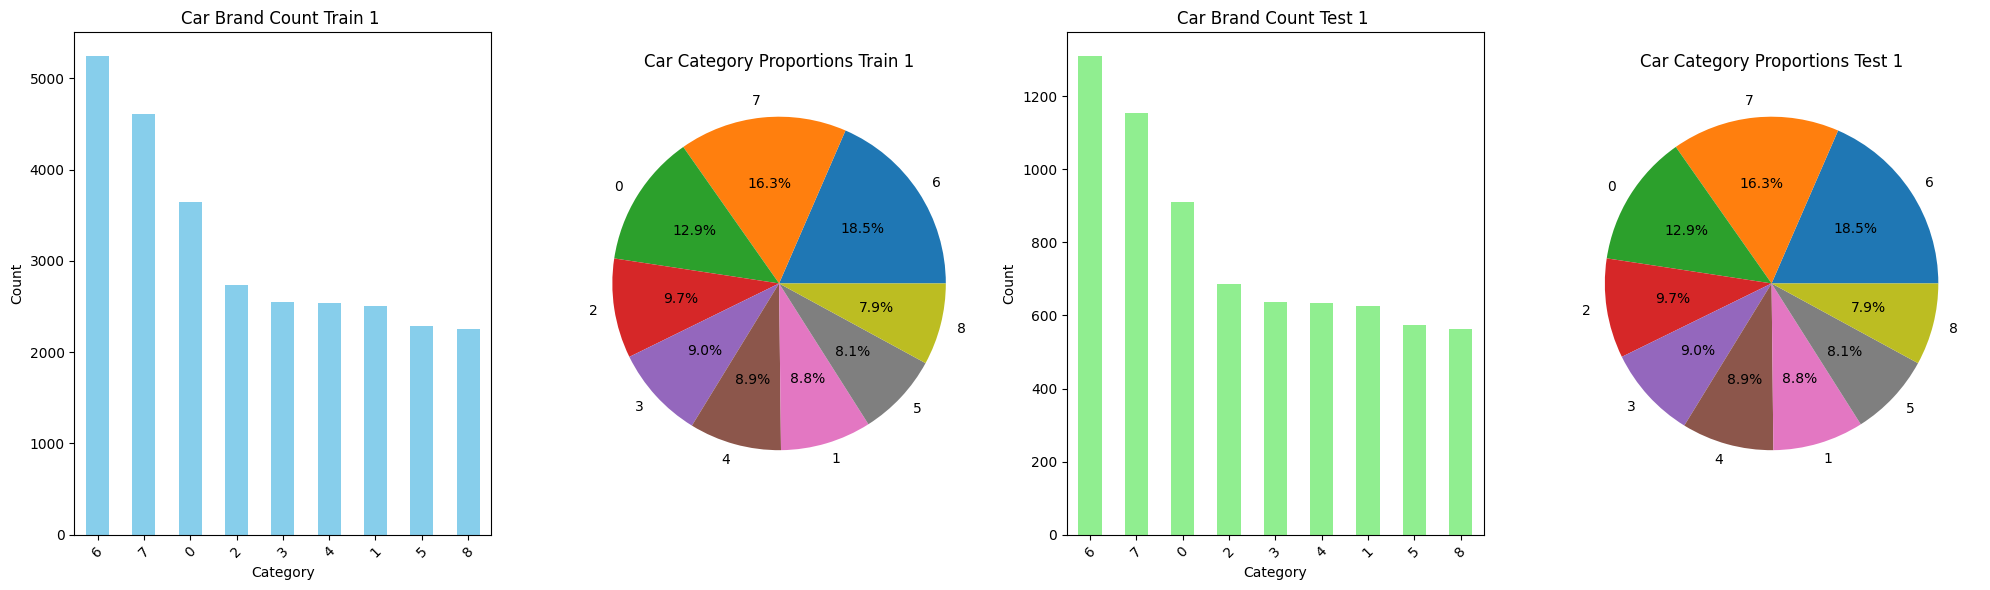

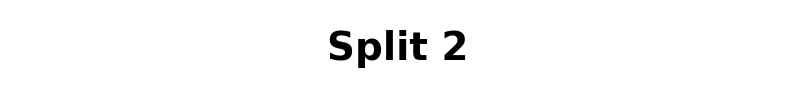

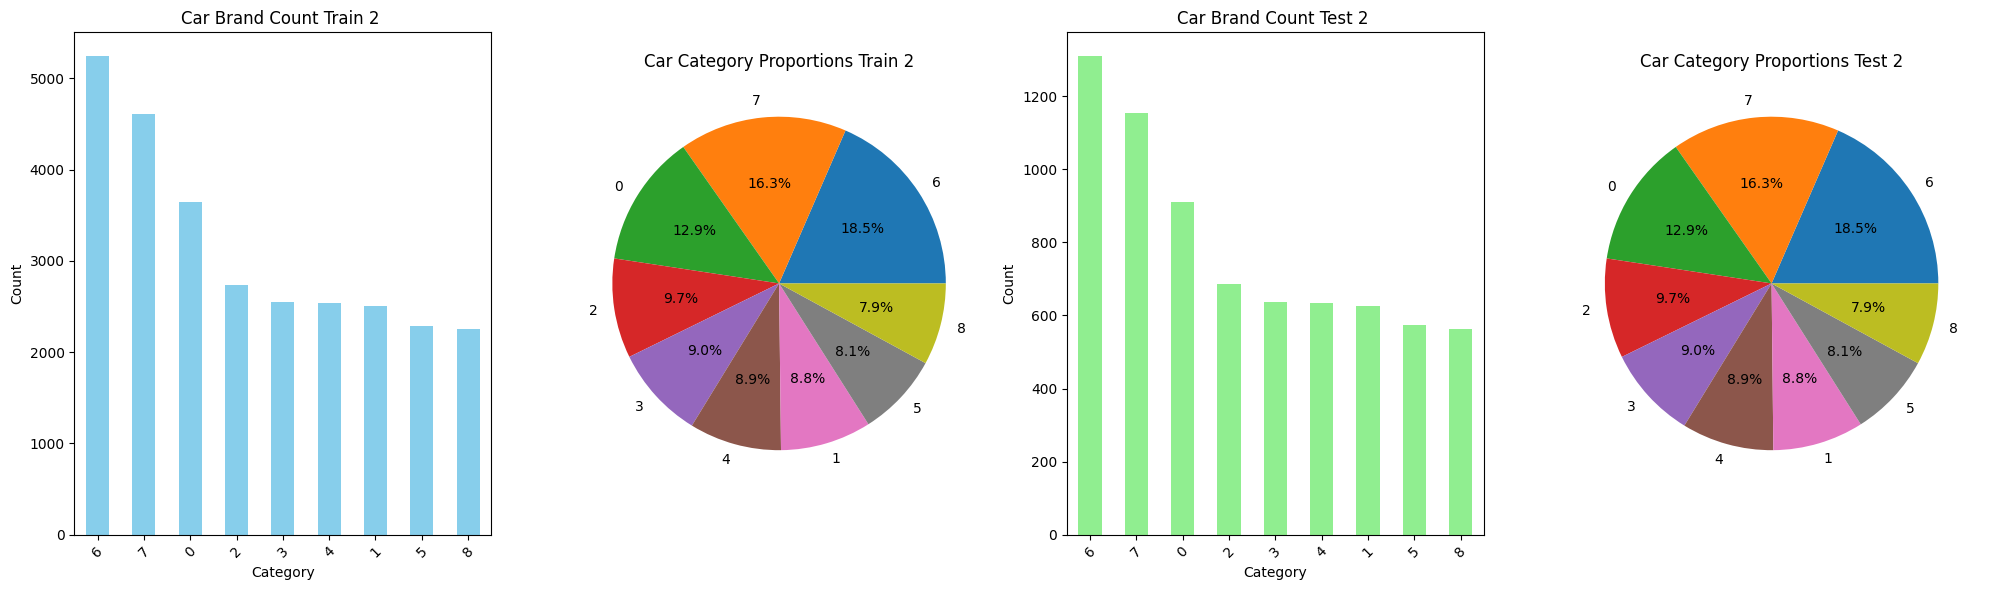

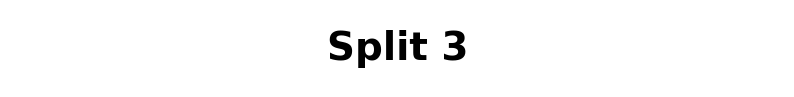

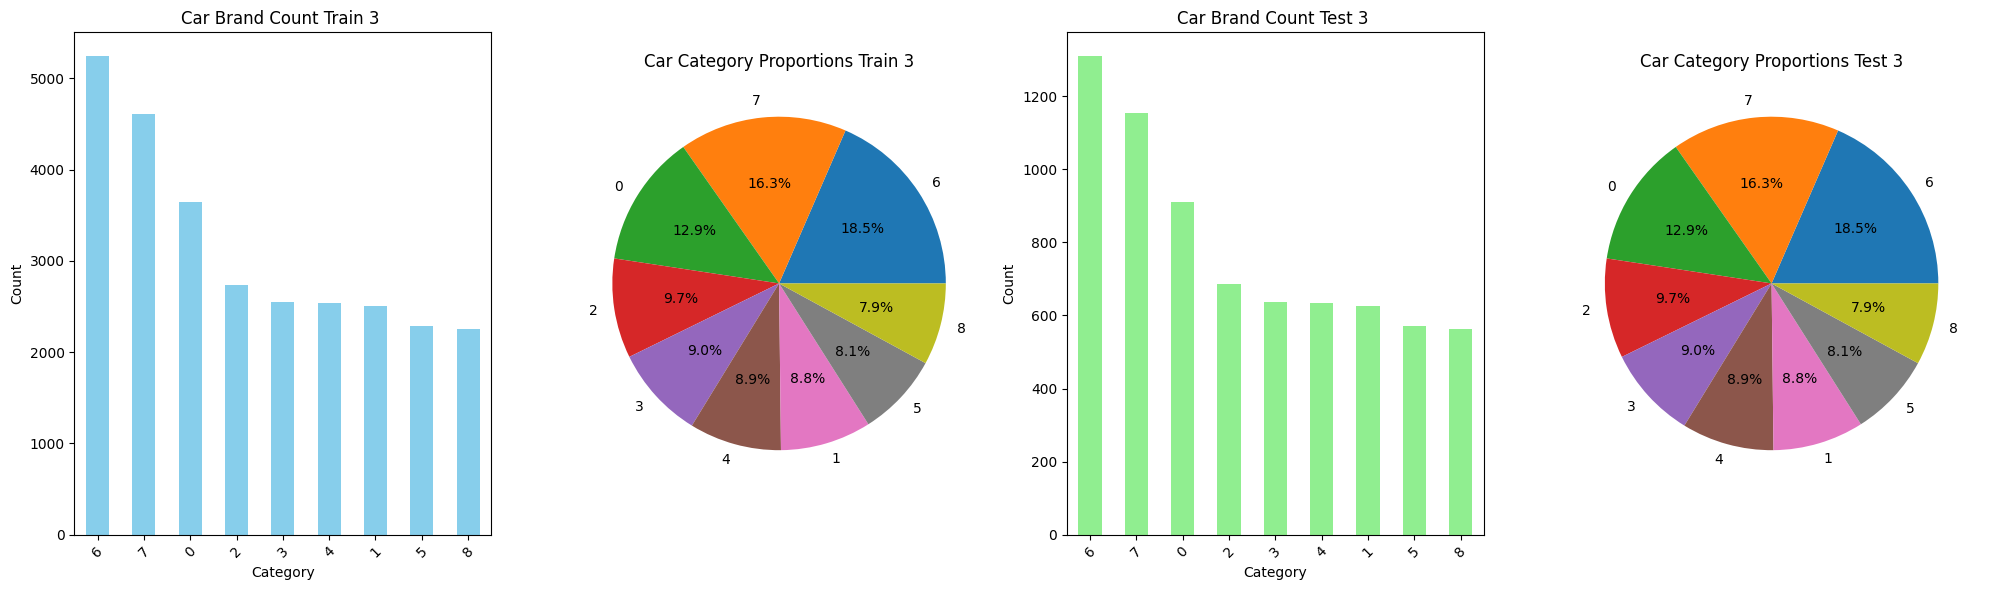

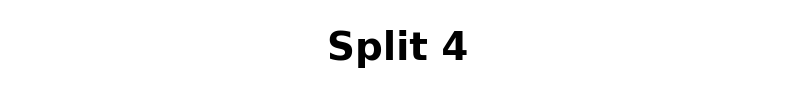

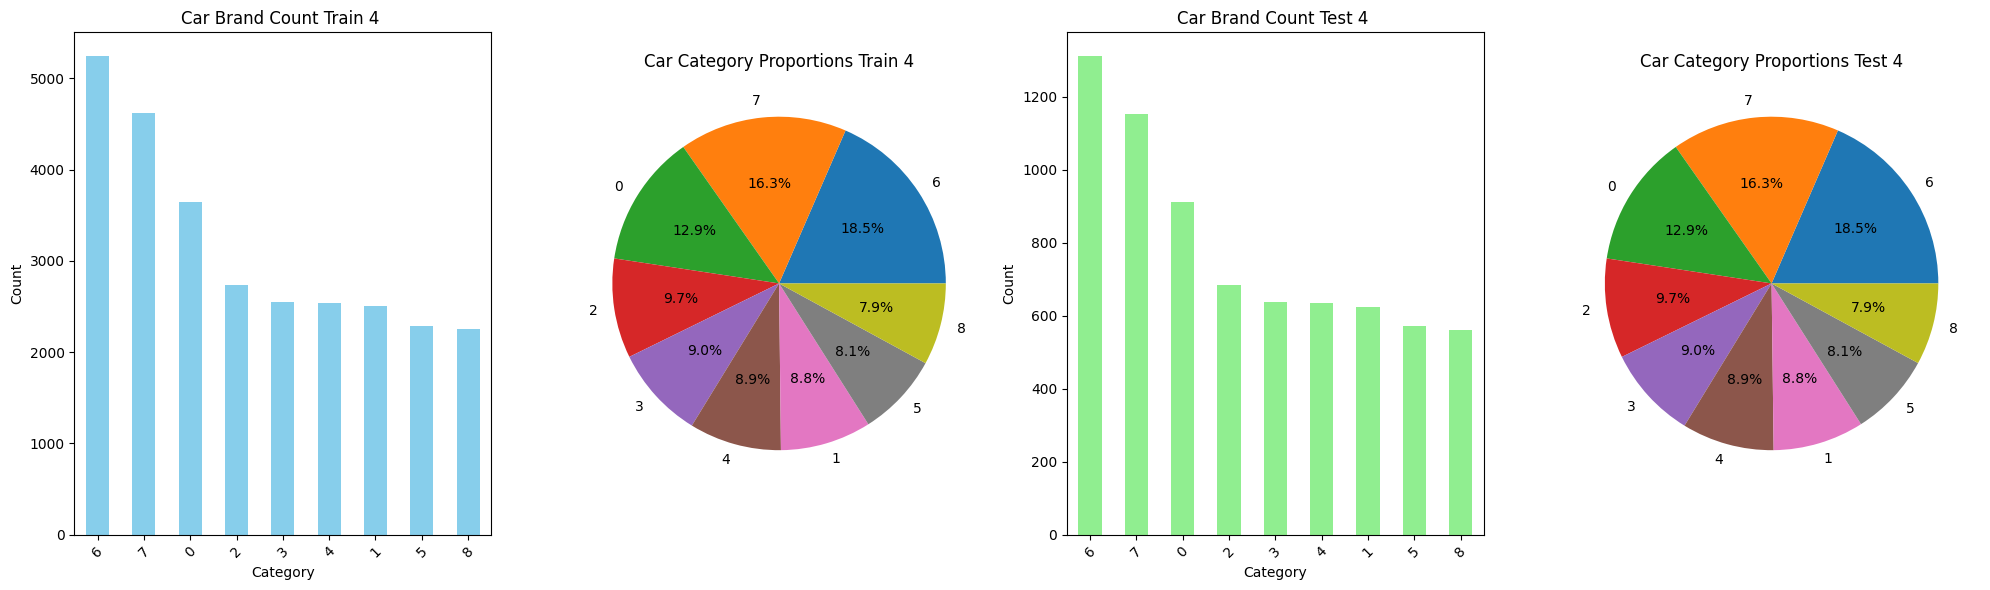

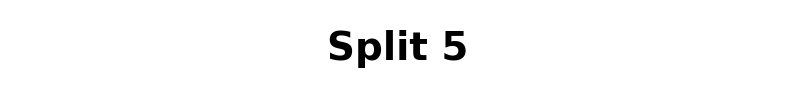

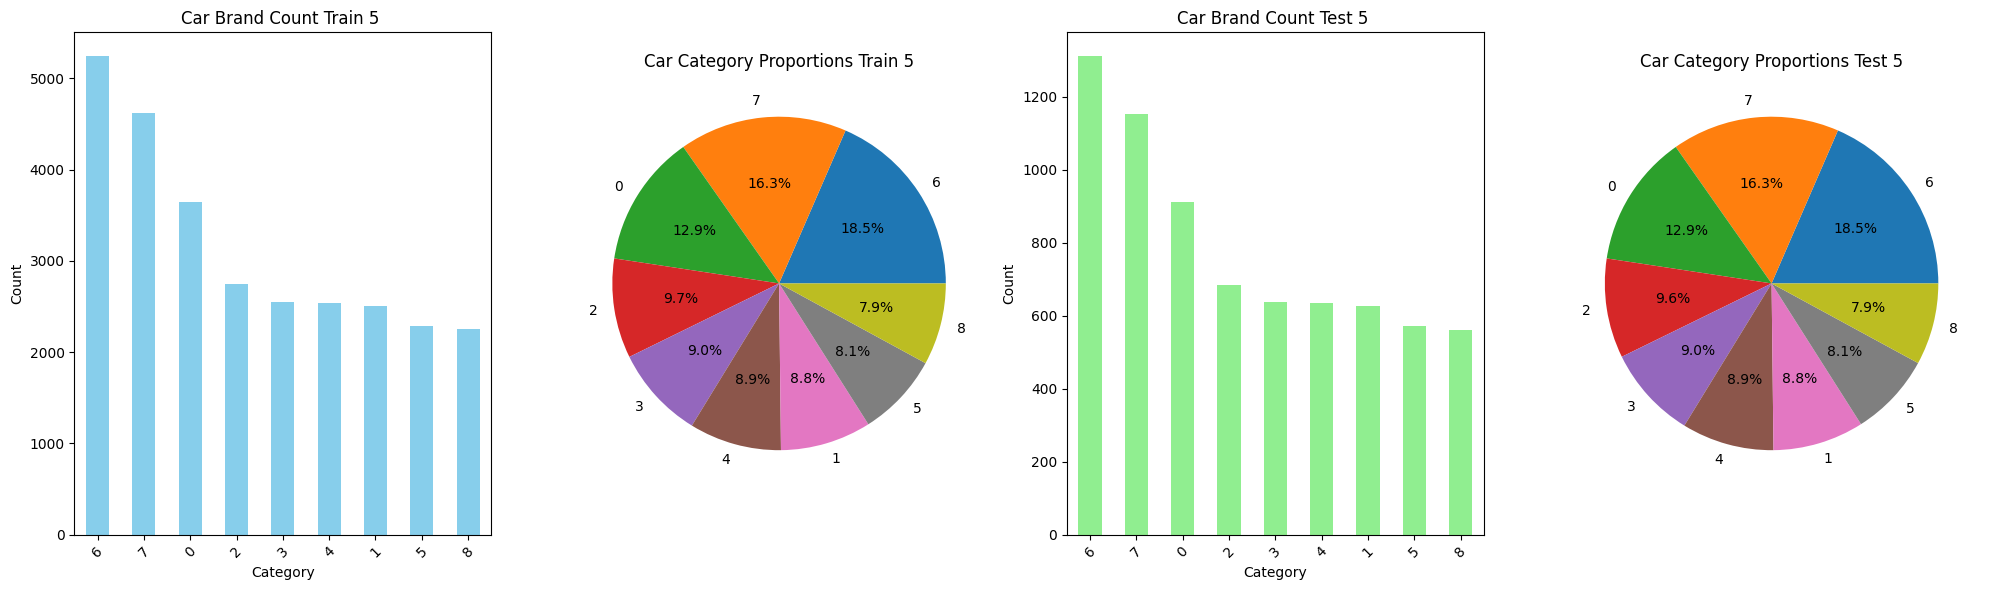

In [8]:
base_dir = '/kaggle/working/'
for i in range(1,6):
    train_file_name = f'CarDataset-Splits-{i}-Train.csv'
    test_file_name = f'CarDataset-Splits-{i}-Test.csv'
    
    fig_title = plt.figure(figsize=(10, 1))
    plt.text(0.5, 0.5, f'Split {i}',
          horizontalalignment='center', verticalalignment='center',
          fontsize=28, weight='bold', fontname='Arial')
    plt.axis('off')
    plt.show()
    
    ### Load train và test df
    train_path = os.path.join(base_dir, train_file_name)
    test_path = os.path.join(base_dir, test_file_name)
    df_train = pd.read_csv(train_path)
    df_test = pd.read_csv(test_path)
    
    train_value_counts = df_train['CategoryID'].value_counts()
    test_value_counts = df_test['CategoryID'].value_counts()
    
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))

    # Biểu đồ cột cho tập train
    train_value_counts.plot(kind='bar', ax=axes[0], color='skyblue', title=f'Car Brand Count Train {i} ')
    axes[0].set_xlabel('Category')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=45)

    # Biểu đồ hình tròn cho tập train
    train_value_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', title=f'Car Category Proportions Train {i}')
    axes[1].set_ylabel('')

    # Biểu đồ cột cho test
    test_value_counts.plot(kind='bar', ax=axes[2], color='lightgreen', title=f'Car Brand Count Test {i} ')
    axes[2].set_xlabel('Category')
    axes[2].set_ylabel('Count')
    axes[2].tick_params(axis='x', rotation=45)

    # Biểu đồ hình tròn cho tập train
    test_value_counts.plot(kind='pie', ax=axes[3], autopct='%1.1f%%', title=f'Car Category Proportions Test {i}')
    axes[3].set_ylabel('')
    
    plt.tight_layout()
    plt.show()
